<image src = "Machine Learning/Neural_Network/image/Neural network.png">

In [49]:
import numpy as np

In [50]:
# Set Number of Neurons in all 3 layers.
input_layer = 3
hidden_layer = [3,2]
output_layer = 2

In [51]:
# Softmax Function

def softmax(a):
    e_pa = np.exp(a)
    return e_pa/np.sum(e_pa,axis=1,keepdims=True)



In [52]:
# Neural Network

class NeuralNetwork:
    # Constructor
    def __init__(self,input_layer,hidden_layer,output_layer):
        #self.activation_points = None
        np.random.seed(0)
        model = {}
        
        # Layer 1
        model['W1'] = np.random.randn(input_layer,hidden_layer[0])
        model['B1'] = np.random.randn(1,hidden_layer[0])
        
        # Layer 2
        model['W2'] = np.random.randn(hidden_layer[0],hidden_layer[1])
        model['B2'] = np.random.randn(1,hidden_layer[1])
        
        # Layer 3
        model['W3'] = np.random.randn(hidden_layer[1],output_layer)
        model['B3'] = np.random.randn(1,output_layer)
        
        self.model = model
    
    def forward(self,x):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        B1,B2,B3 = self.model['B1'],self.model['B2'],self.model['B3']
            
        z1 = np.dot(x,W1) + B1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + B2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + B3
        y_ = softmax(z3)
            
        self.activation_points = (a1,a2,y_)
        return y_
    
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        #b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_points
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['B1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['B2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['B3']  -= learning_rate*db3
            
    def predict(self,x):
            y_out = self.forward(x)
            return np.argmax(y_out,axis=1)
        
    def summary(self):
            W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
            a1,a2,y_ = self.activation_points
            
            print('W1:',W1.shape)
            print('A1:',a1.shape)
            
            print('W2:',W2.shape)
            print('A2:',a2.shape)
            
            print('W3:',W3.shape)
            print('A3:',y_.shape)
    
    def loss(self,y_oht,p):
        l = -np.mean(y_oht*np.log(p))
        return l
    
    def one_hot(self,y,depth):
    
        m = y.shape[0]
        y_oht = np.zeros((m,depth))
        y_oht[np.arange(m),y] = 1
        return y_oht
    
    def train(self,x,y,maxEpochs,learning_rate = 0.001,logs = False):
        training_loss = []       
        classes = x.shape[1]
        y_oht = self.one_hot(y,depth=classes)
        
        for ix in range(maxEpochs):
            Y_ = self.forward(X)
            l = self.loss(y_oht,Y_)
            training_loss.append(l)
            self.backward(X,y_oht,learning_rate) 
            if(logs):
                print("Epoch %d Loss %.4f"%(ix,l))
        return training_loss


In [53]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [54]:
X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)

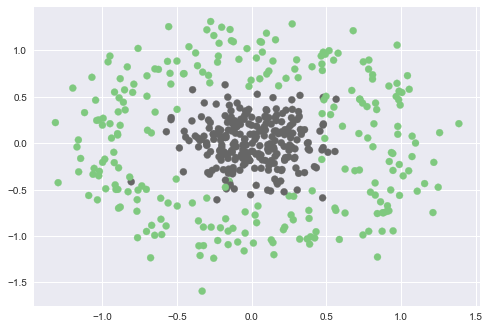

In [55]:
plt.figure(0)
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [56]:
nn = NeuralNetwork(2,[10,5],2)
nn.forward(X).shape
nn.summary()

W1: (2, 10)
A1: (500, 10)
W2: (10, 5)
A2: (500, 5)
W3: (5, 2)
A3: (500, 2)


In [57]:
losses = nn.train(X,Y,maxEpochs=1000)

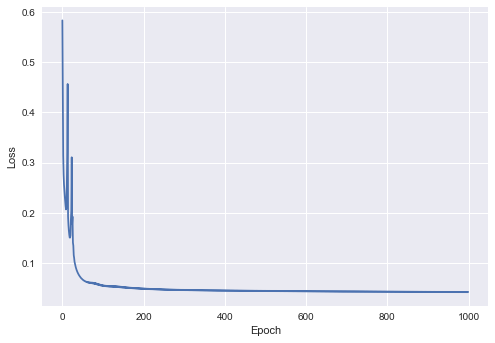

In [58]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [61]:
import visualize

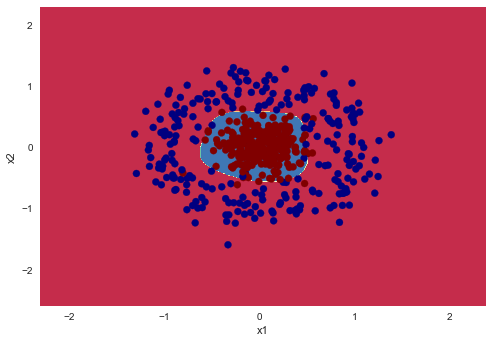

In [62]:
visualize.plot_decision_boundary(lambda x:nn.predict(x),X,Y)

In [63]:
accuracy = np.sum(nn.predict(X) == Y)/float(X.shape[0])

In [74]:
print("ACCURACY IS %4f"%(accuracy))

ACCURACY IS 0.970000


In [75]:
from sklearn.datasets import make_moons,make_circles,make_classification

In [78]:
def load_datasets(dataset):
    if dataset=='moons':
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1) 
    elif dataset=='circles':
        X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2,
                           random_state=1, factor=0.2)
    elif dataset=='classification':
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,
                                  n_redundant=0,random_state=1)
    return X,Y

Training Acc 0.9720


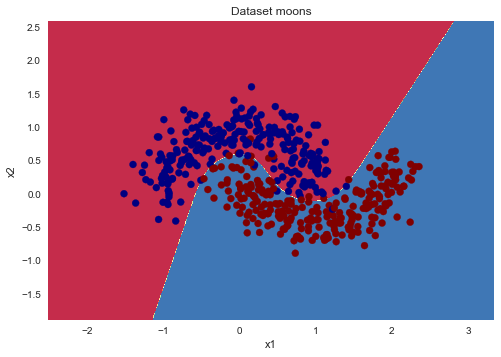

Training Acc 0.9620


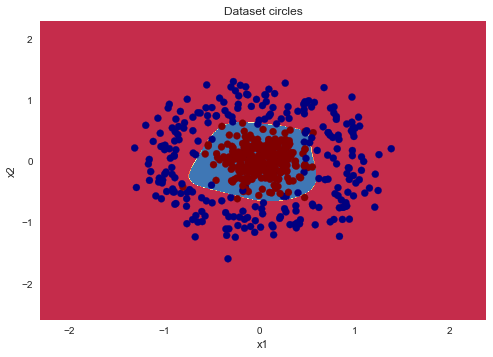

Training Acc 0.9600


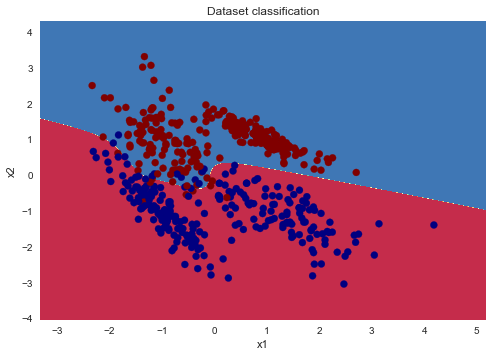

In [83]:
dataset = ['moons','circles','classification']
for d in dataset:
    model = NeuralNetwork(2,[4,3],2)
    X,Y  = load_datasets(d)
    model.train(X,Y,1000)
    outputs = model.predict(X)
    
    training_accuracy = np.sum(outputs==Y)/Y.shape[0]
    plt.title("Dataset "+d)
    visualize.plot_decision_boundary(lambda x:model.predict(x),X,Y)
    print("Training Acc %.4f"%training_accuracy)
    plt.show()
